In [1]:
# Importar librerias
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd

In [2]:
# Cargar datos
datos = pd.read_csv(r"C:\Users\pipeg\Desktop\U\S6\Analisis de Datos\Etapa 4\archive\Cleaned-Data.csv", sep = ",")

In [3]:
X = datos.drop('Severity_Mild', axis=1)
y = datos['Severity_Mild']

In [4]:
y

0         1
1         1
2         1
3         0
4         0
         ..
316795    0
316796    0
316797    0
316798    0
316799    0
Name: Severity_Mild, Length: 316800, dtype: int64

In [5]:
# Estadísticas descriptivas
df = pd.DataFrame(X, columns=datos.columns)
print(df.describe())

               Fever      Tiredness      Dry-Cough  Difficulty-in-Breathing  \
count  316800.000000  316800.000000  316800.000000            316800.000000   
mean        0.312500       0.500000       0.562500                 0.500000   
std         0.463513       0.500001       0.496079                 0.500001   
min         0.000000       0.000000       0.000000                 0.000000   
25%         0.000000       0.000000       0.000000                 0.000000   
50%         0.000000       0.500000       1.000000                 0.500000   
75%         1.000000       1.000000       1.000000                 1.000000   
max         1.000000       1.000000       1.000000                 1.000000   

         Sore-Throat   None_Sympton          Pains  Nasal-Congestion  \
count  316800.000000  316800.000000  316800.000000     316800.000000   
mean        0.312500       0.062500       0.363636          0.545455   
std         0.463513       0.242062       0.481046          0.497930   


In [6]:
# Distribución de clases
print(df.groupby(y).size())

Severity_Mild
0    237600
1     79200
dtype: int64


In [7]:
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,NaN,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,NaN,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,NaN,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,NaN,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,NaN,1,0,0,0,1,0,China


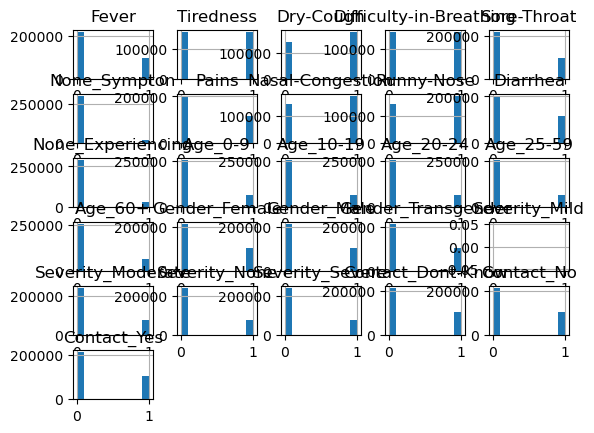

In [8]:
# Histogramas  
df.hist()
plt.show()

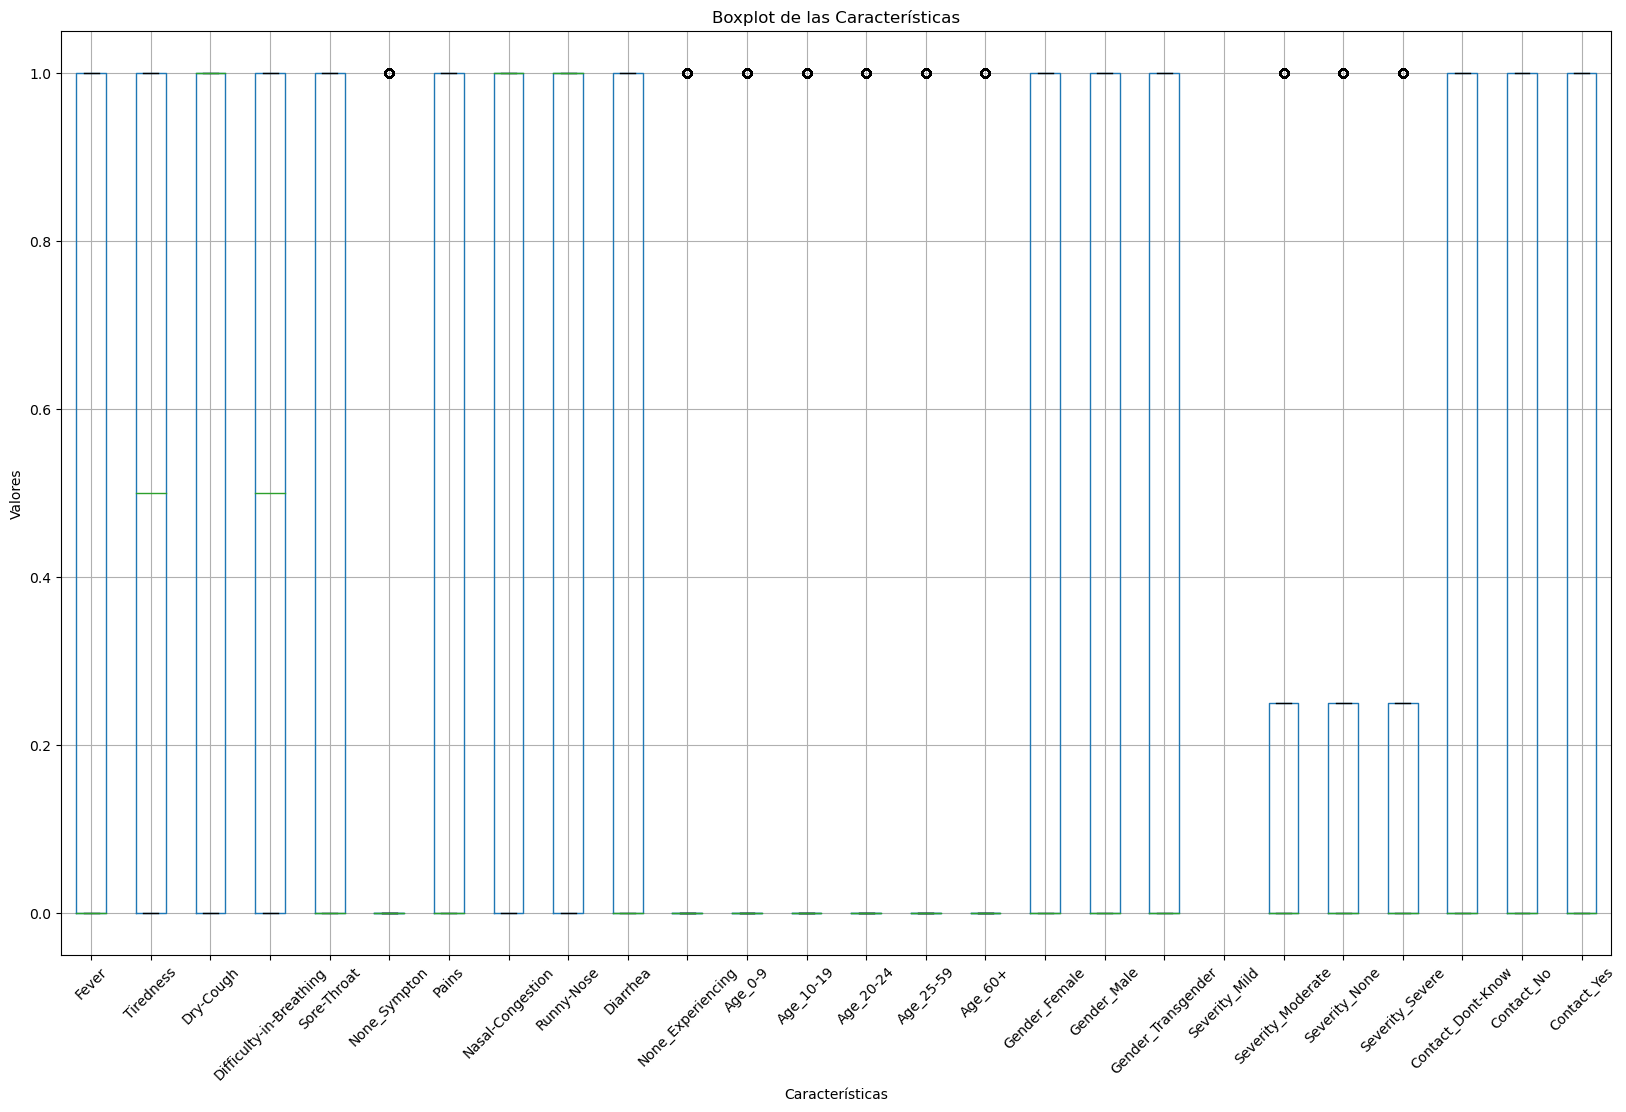

In [9]:
# Boxplot
df.boxplot(figsize=(20, 12), rot=45)

plt.title('Boxplot de las Características')
plt.xlabel('Características')
plt.ylabel('Valores')

plt.show()

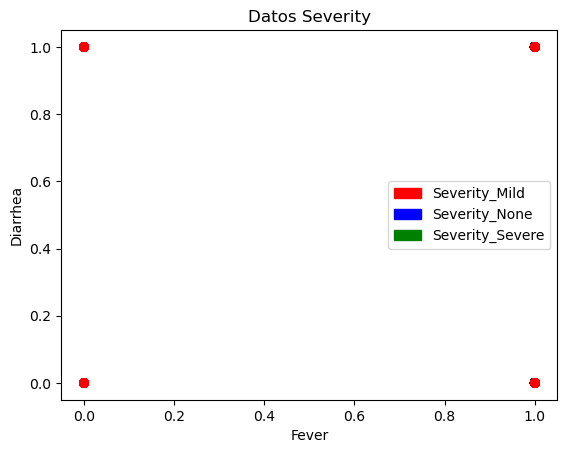

In [10]:
# Gráficas 
# Gráfica de dispersión 
# Vector de colores por valor de clase 
color_map = {0: 'red', 1: 'blue', 2: 'green'} 
label_map = {0: 'Severity_Mild', 1: 'Severity_None', 2: 'Severity_Severe'}
colors = [color_map[c] for c in y]

# Utiliza las primeras dos columnas del conjunto de datos (cambia esto según tus datos reales)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=colors)

# Leyenda con mismos colores
handles = [mpatches.Patch(color=color_map[i], label=label_map[i]) for i in range(len(label_map))]
plt.legend(handles=handles)

# Etiquetas
plt.xlabel('Fever')
plt.ylabel('Diarrhea')
plt.title('Datos Severity')
plt.show()

In [11]:
# Correlación
print(df.corr())

C:\Users\pipeg\AppData\Local\Temp\ipykernel_7992\182892408.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


                                Fever     Tiredness     Dry-Cough  \
Fever                    1.000000e+00  4.045199e-01  5.096472e-02   
Tiredness                4.045199e-01  1.000000e+00  3.779645e-01   
Dry-Cough                5.096472e-02  3.779645e-01  1.000000e+00   
Difficulty-in-Breathing -1.348400e-01  4.629153e-17  3.779645e-01   
Sore-Throat             -1.636364e-01 -1.348400e-01  5.096472e-02   
None_Sympton            -1.740777e-01 -2.581989e-01 -2.927700e-01   
Pains                    2.336708e-17  2.612420e-17  4.519459e-18   
Nasal-Congestion        -8.120278e-17 -6.526807e-17 -5.180861e-17   
Runny-Nose              -1.708735e-16 -1.561936e-16 -9.767619e-17   
Diarrhea                -4.663218e-17 -5.916164e-17 -1.403602e-17   
None_Experiencing       -2.972693e-17 -2.497080e-17 -1.629225e-18   
Age_0-9                  6.959228e-16  4.505202e-16 -1.896458e-17   
Age_10-19                5.727470e-16  8.882113e-17  3.856237e-16   
Age_20-24               -4.855571e

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Dividir datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Crear variables dummy para las columnas categóricas en X_train y X_test
X_train_encoded = pd.get_dummies(X_train, columns=['Country'])
X_test_encoded = pd.get_dummies(X_test, columns=['Country'])

# Verificar dimensiones después de la codificación
print("Dimensiones de X_train_encoded después de la codificación:", X_train_encoded.shape)
print("Dimensiones de X_test_encoded después de la codificación:", X_test_encoded.shape)

# Entrenar el modelo con los datos preprocesados
knn = KNeighborsClassifier()
knn.fit(X_train_encoded, y_train)

Dimensiones de X_train_encoded después de la codificación: (221760, 35)
Dimensiones de X_test_encoded después de la codificación: (95040, 35)


KNeighborsClassifier()

In [18]:
# Convertir X_test_encoded a un array de NumPy
X_test_np = X_test_encoded.values

# Realizar predicciones en el conjunto de prueba
y_pred = knn.predict(X_test_np)

C:\Users\pipeg\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [19]:
# Métricas de evaluación
print("Precisión:", accuracy_score(y_test, y_pred))

Precisión: 0.9392887205387206


In [20]:
# Matriz de confusión
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[71060,   163],
       [ 5607, 18210]], dtype=int64)

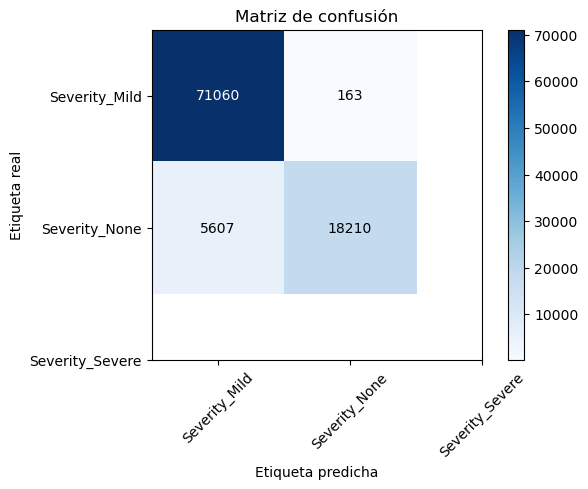

In [21]:
# Suponiendo que cf_matrix es tu matriz de confusión y labels contiene las etiquetas
labels = ["Severity_Mild", "Severity_None", "Severity_Severe"]
plt.imshow(cf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de confusión')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

# Colocar valores en las celdas
fmt = 'd' 
thresh = cf_matrix.max() / 2.
for i in range(cf_matrix.shape[0]):
    for j in range(cf_matrix.shape[1]):
        plt.text(j, i, format(cf_matrix[i, j], fmt), 
                 ha="center", va="center",
                 color="white" if cf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha') 
plt.show()

In [22]:
# Buscar mejor K con GridSearchCV
knn = KNeighborsClassifier()
k_range = range(1, 11)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_encoded, y_train)
print("Mejor k:", grid.best_params_)

C:\Users\pipeg\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pipeg\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pipeg\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pipeg\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pipeg\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

Mejor k: {'n_neighbors': 1}


C:\Users\pipeg\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pipeg\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pipeg\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pipeg\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pipeg\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

Mejor valor de k: 3


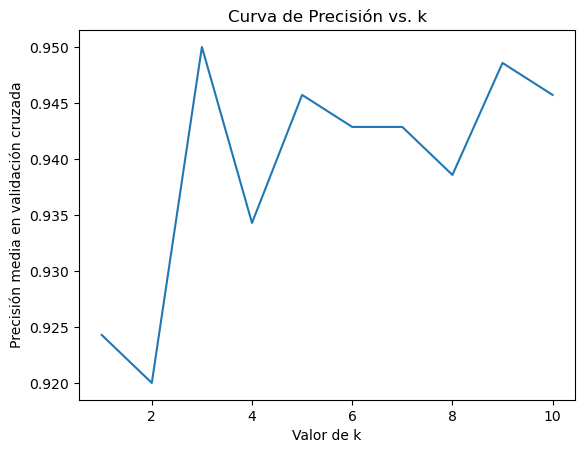

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Crear un conjunto de datos de ejemplo
# (asegúrate de reemplazar esto con tus datos reales)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Lista para almacenar las puntuaciones de la validación cruzada
cv_scores = []

# Rango de valores de k que deseas probar
k_range = range(1, 11)

# Bucle para probar diferentes valores de k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Encontrar el mejor valor de k
best_k = k_range[cv_scores.index(max(cv_scores))]
print(f"Mejor valor de k: {best_k}")

# Graficar la curva de precisión vs. k
plt.plot(k_range, cv_scores)
plt.xlabel('Valor de k')
plt.ylabel('Precisión media en validación cruzada')
plt.title('Curva de Precisión vs. k')
plt.show()

In [29]:
# Entrenar con mejor k
knn = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
knn.fit(X_train, y_train)
# Evaluación
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       153
           1       0.93      0.93      0.93       147

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

